<a href="https://colab.research.google.com/github/suajeong52/heaveMPM/blob/main/0622_sample40_train20_MPM_%EC%B5%9C%EB%8C%80%EC%B5%9C%EC%86%8C%EC%A0%88%EB%8C%80%EA%B0%92%ED%8F%89%EA%B7%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# dp1 ~ dp8 csv 파일과 draftdata2 csv 파일을 불러오기
for i in range(1, 21):
    globals()[f'dp{i}'] = pd.read_csv(f'dp{i}.csv', skiprows=3)

# m1 ~ m8 추출
for i in range(1, 21):
    globals()[f'm{i}'] = globals()[f'dp{i}'].iloc[:, 1:]

# M1 ~ M14, dr1 ~ dr8 계산
M_values = []
dr_values = []
for i in range(1, 21):
    m_data = globals()[f'm{i}']
    max_value = m_data.max().max()  # 최대값
    min_value = m_data.min().min()  # 최소값
    dr_value = (max_value + min_value) / 2  # (최대값 + 최소값) / 2
    dr_values.append(dr_value)  # dr 변수에 추가
    M_values.append(m_data - dr_value)  # M 값을 계산하여 리스트에 추가

# M1 ~ M14, dr1 ~ dr8 할당
for i in range(1, 21):
    globals()[f'M{i}'] = M_values[i-1]
    globals()[f'dr{i}'] = dr_values[i-1]



In [ ]:
print(M1)
print(M5)

      Line A (m)
0      -0.003255
1      -0.003276
2      -0.003344
3      -0.003469
4      -0.003660
...          ...
4996    0.015412
4997    0.014937
4998    0.014542
4999    0.014225
5000    0.013980

[5001 rows x 1 columns]
      Line A (m)
0      -0.005915
1      -0.005936
2      -0.006007
3      -0.006138
4      -0.006338
...          ...
4996    0.004519
4997    0.005188
4998    0.005944
4999    0.006788
5000    0.007719

[5001 rows x 1 columns]


In [ ]:
for i in range(1, 21):
    locals()[f'M{i}'] = abs(locals()[f'M{i}'])


In [ ]:
print(M1)
print(M5)

      Line A (m)
0       0.003255
1       0.003276
2       0.003344
3       0.003469
4       0.003660
...          ...
4996    0.015412
4997    0.014937
4998    0.014542
4999    0.014225
5000    0.013980

[5001 rows x 1 columns]
      Line A (m)
0       0.005915
1       0.005936
2       0.006007
3       0.006138
4       0.006338
...          ...
4996    0.004519
4997    0.005188
4998    0.005944
4999    0.006788
5000    0.007719

[5001 rows x 1 columns]


In [ ]:

from scipy.signal import find_peaks
import matplotlib.pyplot as plt


In [ ]:
M1

,Line A (m)
0,0.003255
1,0.003276
2,0.003344
3,0.003469
4,0.003660
...,...
4996,0.015412
4997,0.014937
4998,0.014542
4999,0.014225


MAX1: [0.04829407 0.02901697 0.03839922 0.0225873  0.04386806 0.04376793
 0.03523016 0.04289389 0.01351357 0.04454947 0.02620649 0.02464724
 0.04726791 0.01238537 0.0290041  0.03044367 0.02006769 0.05765343
 0.01928663 0.0358963  0.03781366 0.01226616 0.04471684 0.04189205
 0.0185051  0.04280758 0.00853252 0.04584694 0.04175711 0.02920818
 0.05765343 0.00183678 0.01521015 0.04089642 0.03417492 0.03560781
 0.05047798 0.00553656 0.04139709 0.02800035 0.0341506  0.03603601
 0.04009438 0.0333333  0.01254177 0.04962111 0.02029514 0.03214073
 0.0328393  0.03370571 0.02929401 0.04374218 0.00797987 0.00349951
 0.05137587 0.03401423 0.02646875 0.03375578 0.02542639 0.04420137
 0.00318527 0.03588486 0.04378414 0.00783396 0.00095463 0.04858875
 0.03045321 0.03724957 0.00618505 0.0059247  0.05105209 0.03493452
 0.02406216 0.04170752 0.002491   0.03698635 0.03055954 0.01983786
 0.05465889 0.0233736  0.04331446 0.02493095 0.02695227 0.0324254
 0.04111814 0.03792667 0.03638172]
Top 20 MAX values for 

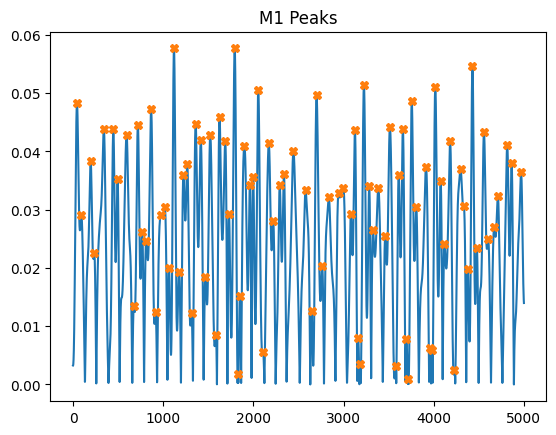

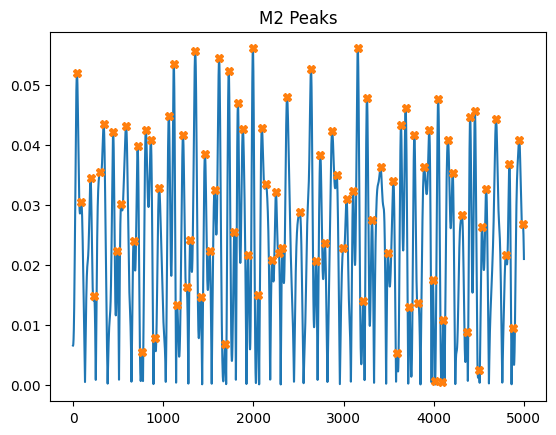

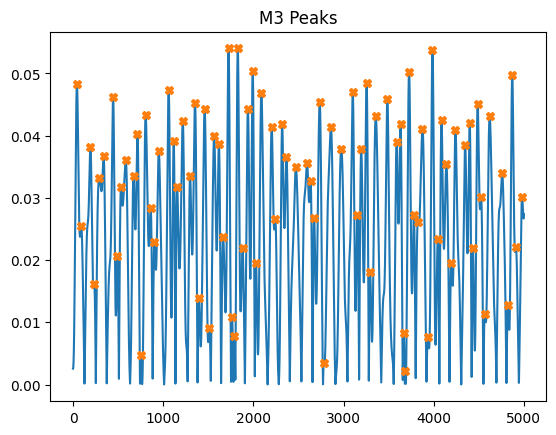

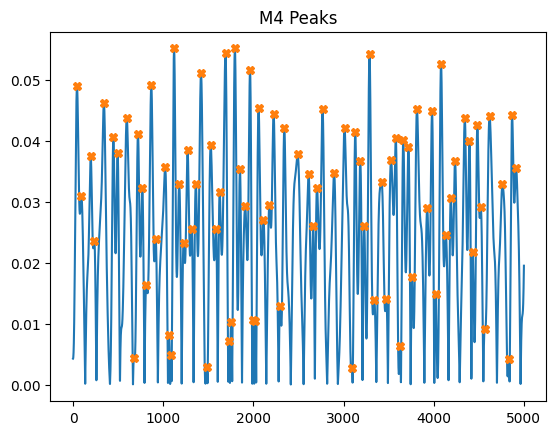

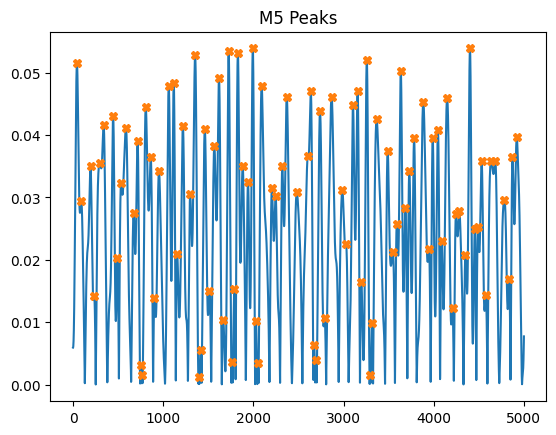

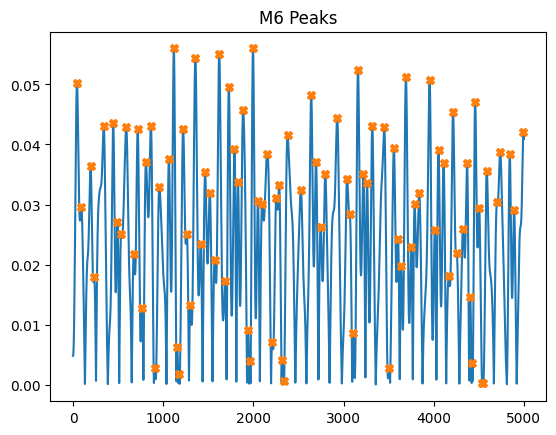

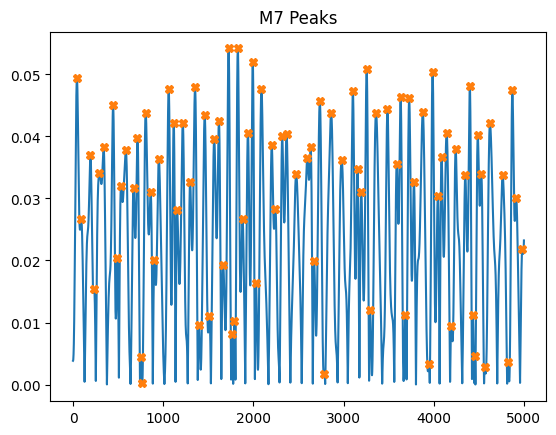

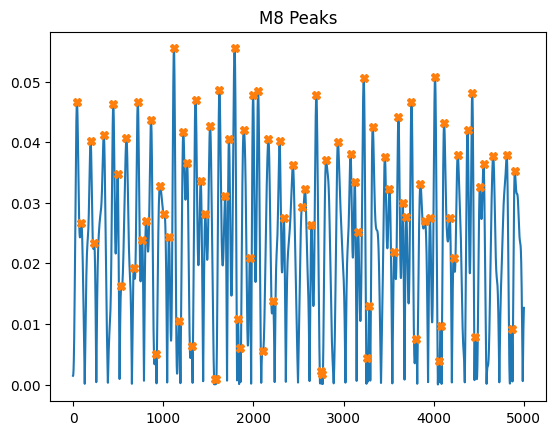

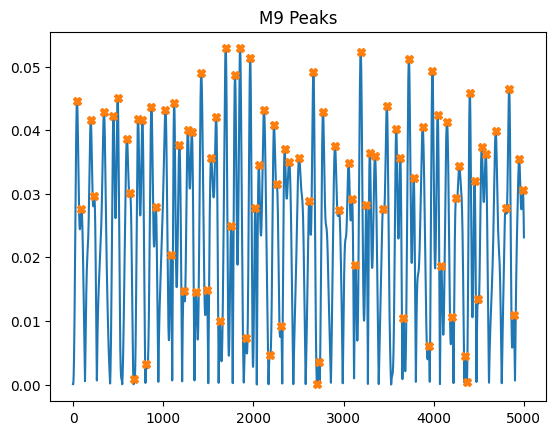

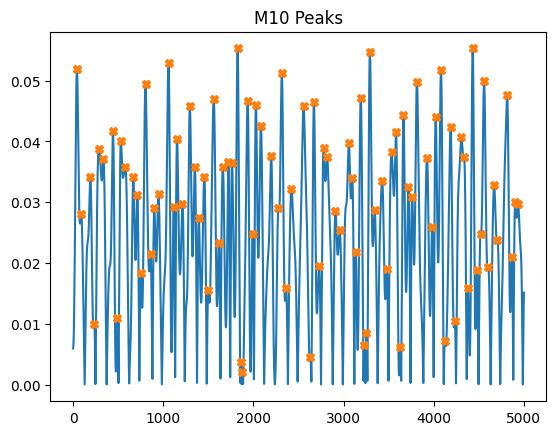

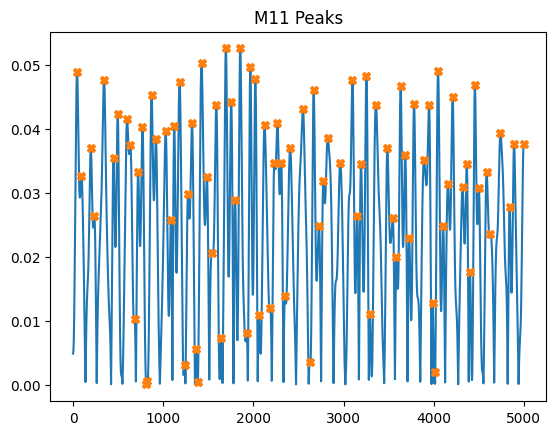

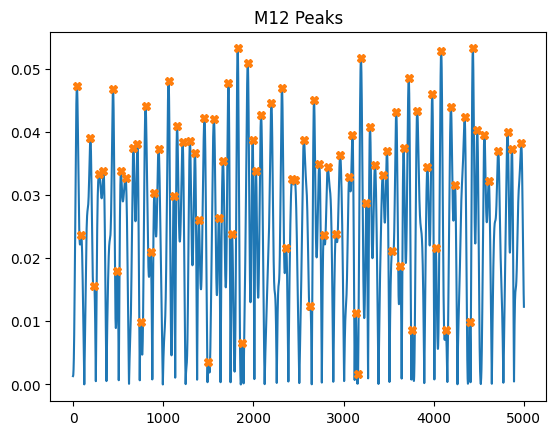

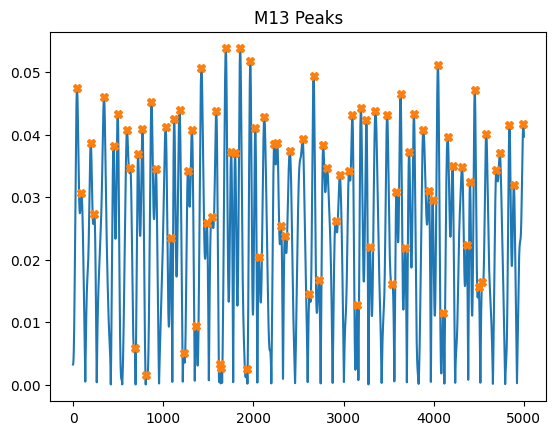

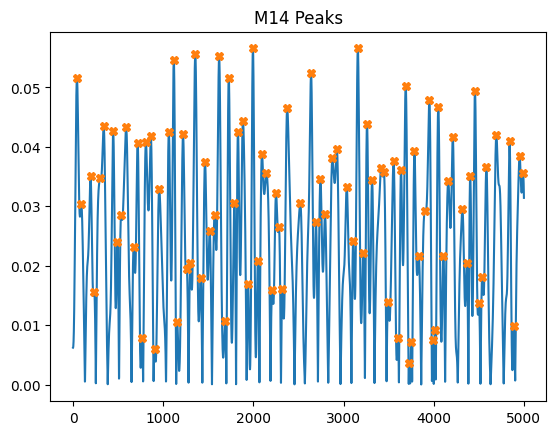

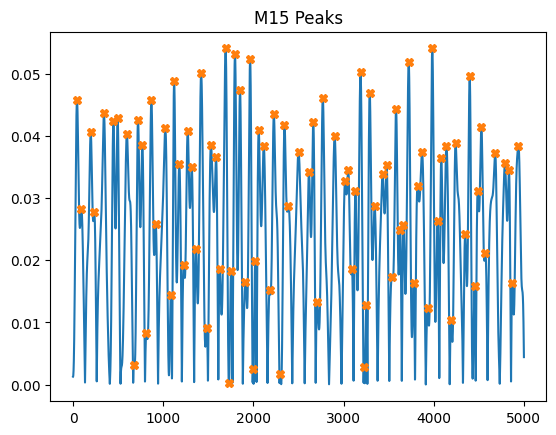

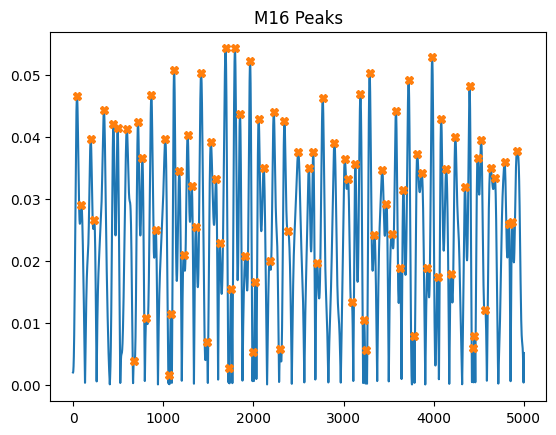

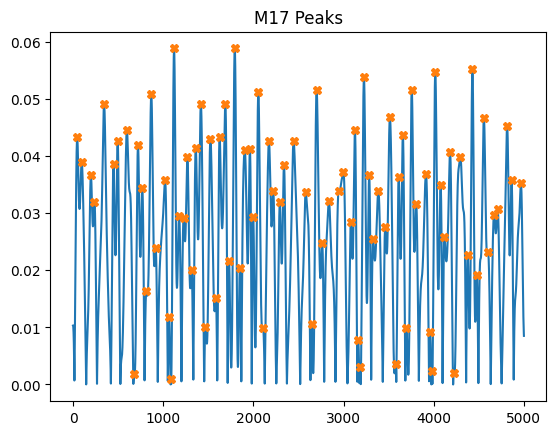

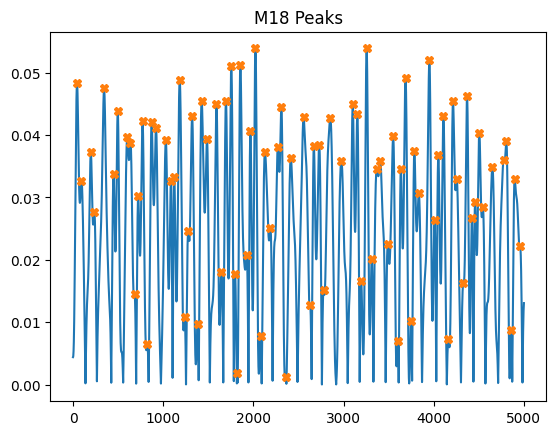

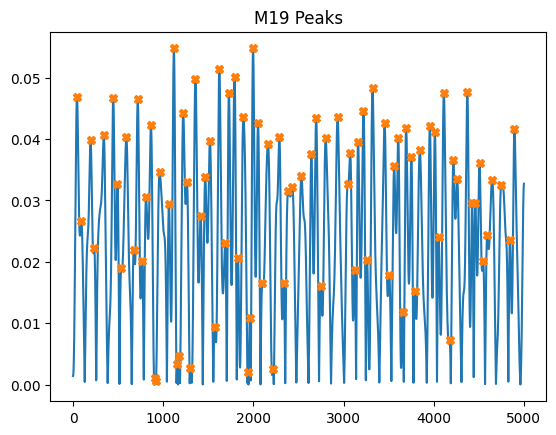

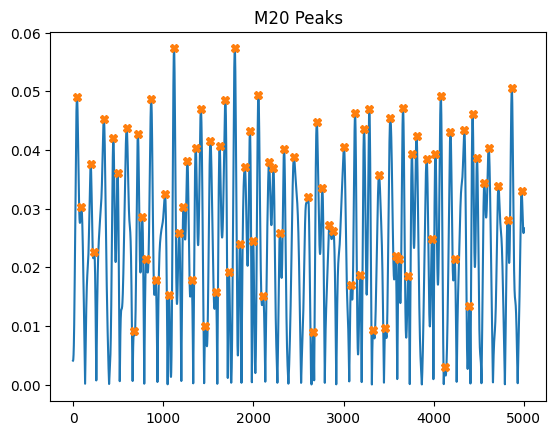

In [ ]:
mpm_list = []
for i in range(1, 21):
    # find peaks
    peaks_i, properties_i = find_peaks(locals()[f'M{i}'].iloc[:, 0], height=0)

    # plot peaks
    plt.figure()
    plt.plot(locals()[f'M{i}'])
    plt.plot(peaks_i, locals()[f'M{i}'].iloc[:, 0][peaks_i], "X")
    plt.title(f'M{i} Peaks')

    # calculate MPM
    MAX_i = properties_i["peak_heights"]
    print(f'MAX{i}: {MAX_i}')

    sorted_index_array = np.argsort(MAX_i)
    sorted_array = MAX_i[sorted_index_array]

    n=20
    MAX_r_i = sorted_array[-n:]

    print(f'Top {n} MAX values for M{i}: {MAX_r_i}')

    t2 = 6.5
    p = 0.37
    sigma_i = np.std(MAX_r_i)
    mean_i = np.mean(MAX_r_i)
    gamma = 0.577
    beta_i = (np.sqrt(6) / np.pi) * sigma_i
    mu_i = mean_i - ((np.sqrt(6) / np.pi) * sigma_i * gamma)
    l = -np.log(p)
    MPM_i = -np.log(l) * beta_i + mu_i
    mpm_list.append(MPM_i)
    print(f'MPM{i}: {MPM_i}')


In [ ]:
print(mpm_list)

[0.045821825965259085, 0.04692996160486003, 0.04613906729334563, 0.04625405274872343, 0.04765395204044239, 0.046193856773804574, 0.046440068657814526, 0.045571676138088685, 0.04554254611460422, 0.04761474322322636, 0.04621006078714509, 0.04552685819158221, 0.04510706102984071, 0.04666137880305875, 0.04611208614665545, 0.04600883185486049, 0.04746671863903415, 0.04576119986000106, 0.0452777874949084, 0.04590519123235482]


In [ ]:
import pandas as pd

In [ ]:
dftrain = pd.DataFrame(mpm_list)
dftrain.to_excel('mpmtrain_high_20.xlsx', sheet_name='xtrain_sheet')